In [171]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [172]:
import gym
import gym_maze
import time
import random
import numpy as np
import tqdm
import glob
from PIL import Image


In [173]:
gym_maze.__path__

['/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/gym_maze-0.4-py3.7.egg/gym_maze']

In [174]:
env = gym.make('maze-sample-10x10-v0')

In [175]:
def get_state(obs):
    return int(obs[1] * np.sqrt(state_n)+obs[0])

In [176]:
def policy_evaluation(policy, ):
    pass

In [177]:
class RandomAgent():
    def __init__(self, action_n):
        self.action_n = action_n
        return None
    def get_action(self, state):
        return random.randint(0, self.action_n-1)

In [178]:
class CrossEntropyMethod():
    def __init__(self, state_n, action_n):
        self.state_n = state_n
        self.action_n = action_n
        self.policy = np.ones((self.state_n, self.action_n)) / self.action_n
    
    def get_action(self, state):
        return int(np.random.choice(np.arange(self.action_n), p=self.policy[state]))
    
    def update_policy(self, elite_trajectories):
        pre_policy = np.zeros((self.state_n, self.action_n))
        
        for trajectory in elite_trajectories:
            for state, action in zip(trajectory['states'], trajectory['actions']):
                pre_policy[state][action] += 1
                
        for state in range(self.state_n):
            if sum(pre_policy[state]) == 0:
                self.policy[state] = np.ones(self.action_n) / self.action_n
            else:
#                 self.policy[state] = pre_policy[state] / sum(pre_policy[state])
                self.policy[state] = (pre_policy[state]+lambd) / (sum(pre_policy[state])+lambd*self.action_n)
                
        return None
    def laplace_smoothing_update(self, elite_trajectories, lambd):
        pre_policy = np.zeros((self.state_n, self.action_n))
        
        # counter
        for trajectory in elite_trajectories:
            for state, action in zip(trajectory['states'], trajectory['actions']):
                pre_policy[state][action] += 1
        
        # 
        for state in range(self.state_n):
            if sum(pre_policy[state]) == 0:
                self.policy[state] = np.ones(self.action_n) / self.action_n
            else:
                self.policy[state] = (pre_policy[state]+lambd) / (sum(pre_policy[state])+lambd*self.action_n)
        return None
    def policy_smoothing_update(self, elite_trajectories, lambd):
        pre_policy = np.zeros((self.state_n, self.action_n))
        
        # counter
        for trajectory in elite_trajectories:
            for state, action in zip(trajectory['states'], trajectory['actions']):
                pre_policy[state][action] += 1
        
        # 
        for state in range(self.state_n):
            if sum(pre_policy[state]) == 0:
                new_policy = np.ones(self.action_n) / self.action_n
            else:
                new_policy = pre_policy[state] / sum(pre_policy[state])
            self.policy[state] = lambd*new_policy+ (1-lambd)*self.policy[state]
        return None

In [179]:
def get_trajectory(agent, trajectory_len):
    trajectory = {
        'states':[], 
        'actions':[],
        'total_reward': 0}

    obs = env.reset()
    state = get_state(obs)
    trajectory['states'].append(state)
    
    
    for _ in range(trajectory_len):
        action = agent.get_action(state)
#         print(action)
        trajectory['actions'].append(action)
        
        obs, reward, done, _ = env.step(action)
        state = get_state(obs)
        trajectory['states'].append(state)
        trajectory['total_reward'] += reward
#         env.render()
#         time.sleep(0.5)
        if done:
#             print(done)
            break
    return trajectory

In [180]:
def get_elite_trajectories(trajectories, q_param):
    total_rewards = [trajectory['total_reward'] for trajectory in trajectories]
    quantile = np.quantile(total_rewards, q=q_param) 
    return [trajectory for trajectory in trajectories if trajectory['total_reward'] > quantile]


In [181]:
def save_policy_plot(policy):
    global N
    ax = sns.heatmap(policy, linewidth=0.5,  cmap="YlGnBu")
    plt.savefig(f'./policy_maze/{N:06}.jpg')
    plt.close()
    N +=1
def create_gif():
    # filepaths
    fp_in = "./policy_maze/*.jpg"
    fp_out = "./policy_maze_policy_smoothing.gif"

    # https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
    imgs = (Image.open(f) for f in sorted(glob.glob(fp_in)))
    img = next(imgs)  # extract first image from iterator
    img.save(fp=fp_out, format='GIF', append_images=imgs,
             save_all=True, duration=200, loop=0)


In [157]:
create_gif()

agent = RandomAgent(action_n)

In [182]:
env = gym.make('maze-sample-5x5-v0')
obs = env.reset()

/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/gym/utils/passive_env_checker.py:175: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  "Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator."
/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/gym/utils/passive_env_checker.py:191: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  "Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting."
/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/gym/utils/passive_env_checker.py:196: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `opt

In [183]:
state_n = 5*5

action_n = 4


In [184]:
episode_n = 50
trajectory_n = 50
trajectory_len = 75
q_param = 0.7
lambd = 0.1
agent = CrossEntropyMethod(state_n, action_n)

In [ ]:
policy_smoothing_update

In [185]:
agent.policy

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [210]:
trajectory_n

50

In [211]:
trajectories = [get_trajectory(agent, trajectory_len) for _ in range(trajectory_n)]


In [195]:
quantile

-0.3000000000000002

(array([49.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.3   , -0.1916, -0.0832,  0.0252,  0.1336,  0.242 ,  0.3504,
         0.4588,  0.5672,  0.6756,  0.784 ]),
 <a list of 10 Patch objects>)

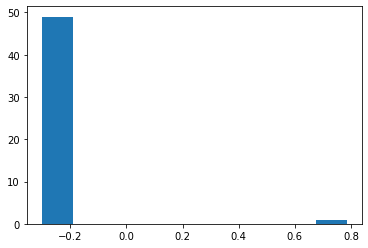

In [212]:
plt.hist([trajectory['total_reward'] for trajectory in trajectories])

In [196]:
total_rewards = [trajectory['total_reward'] for trajectory in trajectories]
quantile = np.quantile(total_rewards, q=q_param) 
elit_traj = [trajectory for trajectory in trajectories if trajectory['total_reward'] > quantile]


In [213]:
et = elit_traj[0]

In [214]:
et

{'states': [0,
  0,
  0,
  1,
  6,
  6,
  1,
  2,
  7,
  12,
  12,
  12,
  12,
  12,
  17,
  17,
  17,
  12,
  12,
  12,
  17,
  22,
  23,
  23,
  23,
  23,
  23,
  18,
  23,
  23,
  18,
  18,
  23,
  22,
  22,
  22,
  21,
  21,
  22,
  17,
  22,
  23,
  18,
  18,
  13,
  13,
  8,
  8,
  8,
  9,
  4,
  3,
  4,
  4,
  4,
  9,
  14,
  19,
  14,
  9,
  14,
  14,
  19,
  24],
 'actions': [1,
  0,
  2,
  1,
  3,
  0,
  2,
  1,
  1,
  2,
  2,
  3,
  3,
  1,
  2,
  2,
  0,
  3,
  3,
  1,
  1,
  2,
  1,
  1,
  2,
  2,
  0,
  1,
  2,
  0,
  3,
  1,
  3,
  1,
  1,
  3,
  3,
  2,
  0,
  1,
  2,
  0,
  2,
  0,
  2,
  0,
  0,
  0,
  2,
  0,
  3,
  2,
  2,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  2,
  1,
  1],
 'total_reward': 0.7519999999999998}

(array([3., 2., 1., 1., 4., 0., 2., 1., 3., 3., 0., 0., 8., 2., 4., 0., 0.,
        5., 5., 2., 0., 2., 6., 9., 1.]),
 array([ 0.  ,  0.96,  1.92,  2.88,  3.84,  4.8 ,  5.76,  6.72,  7.68,
         8.64,  9.6 , 10.56, 11.52, 12.48, 13.44, 14.4 , 15.36, 16.32,
        17.28, 18.24, 19.2 , 20.16, 21.12, 22.08, 23.04, 24.  ]),
 <a list of 25 Patch objects>)

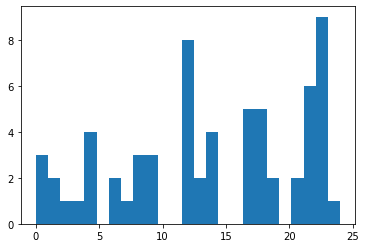

In [209]:
plt.hist(et['states'], bins=25)

(array([15.,  0.,  0., 20.,  0.,  0., 18.,  0.,  0., 10.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

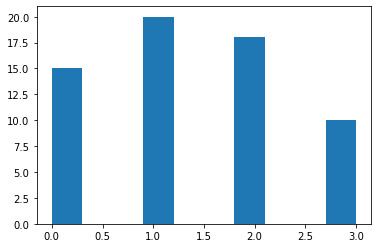

In [207]:
plt.hist(et['actions'])

In [215]:
new_policy = np.zeros(shape=(25,4))
new_policy

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [216]:
for a, s in zip(elit_traj[0]['actions'], elit_traj[0]['states']):
    new_policy[s][a]+=1

In [217]:
new_policy

array([[1., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 1., 1., 1.],
       [0., 0., 0., 0.],
       [1., 0., 0., 1.],
       [0., 1., 0., 0.],
       [2., 0., 1., 0.],
       [1., 2., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 2., 2., 4.],
       [1., 0., 1., 0.],
       [1., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 2., 2., 0.],
       [1., 2., 1., 1.],
       [1., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 1.],
       [1., 2., 2., 1.],
       [3., 2., 3., 1.],
       [0., 0., 0., 0.]])

In [218]:
updated_policy = np.zeros(shape=(25,4))

In [219]:
for j in range(25):
    updated_policy[j] = new_policy[j]/sum(new_policy[j])

/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [220]:
updated_policy

array([[0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.25      , 0.25      , 0.25      , 0.25      ],
       [       nan,        nan,        nan,        nan],
       [0.5       , 0.        , 0.        , 0.5       ],
       [0.        , 1.        , 0.        , 0.        ],
       [0.66666667, 0.        , 0.33333333, 0.        ],
       [0.33333333, 0.66666667, 0.        , 0.        ],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [0.        , 0.25      , 0.25      , 0.5       ],
       [0.5       , 0.        , 0.5       , 0.        ],
       [0.25      , 0.5       , 0.25      , 0.        ],
       [       nan,        nan,        nan,        nan],
       [       nan,        nan,        nan,        nan],
       [0.2       , 0.4       ,

In [221]:
agent.policy = updated_policy

In [222]:
trajectories = [get_trajectory(agent, trajectory_len) for _ in range(trajectory_n)]


In [197]:
len(elit_traj)

1

(array([49.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([-0.3       , -0.26493333, -0.22986667, -0.1948    , -0.15973333,
        -0.12466667, -0.0896    , -0.05453333, -0.01946667,  0.0156    ,
         0.05066667,  0.08573333,  0.1208    ,  0.15586667,  0.19093333,
         0.226     ,  0.26106667,  0.29613333,  0.3312    ,  0.36626667,
         0.40133333,  0.4364    ,  0.47146667,  0.50653333,  0.5416    ,
         0.57666667,  0.61173333,  0.6468    ,  0.68186667,  0.71693333,
         0.752     ]),
 <a list of 30 Patch objects>)

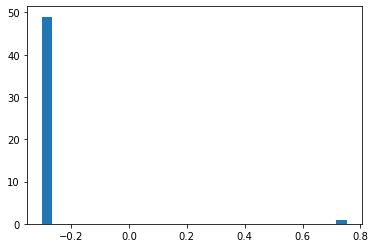

In [189]:
plt.hist([t['total_reward'] for t in trajectories], bins=30)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,
        13.,  9.,  4.,  8.]),
 array([-0.3       , -0.26026667, -0.22053333, -0.1808    , -0.14106667,
        -0.10133333, -0.0616    , -0.02186667,  0.01786667,  0.0576    ,
         0.09733333,  0.13706667,  0.1768    ,  0.21653333,  0.25626667,
         0.296     ,  0.33573333,  0.37546667,  0.4152    ,  0.45493333,
         0.49466667,  0.5344    ,  0.57413333,  0.61386667,  0.6536    ,
         0.69333333,  0.73306667,  0.7728    ,  0.81253333,  0.85226667,
         0.892     ]),
 <a list of 30 Patch objects>)

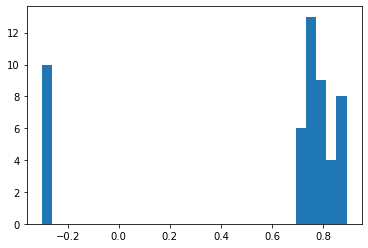

In [223]:
plt.hist([t['total_reward'] for t in trajectories], bins=30)

In [224]:
mean_total_reward = np.mean([trajectory['total_reward'] for trajectory in trajectories])

In [ ]:
q_param

In [226]:
total_rewards = [trajectory['total_reward'] for trajectory in trajectories]
quantile = np.quantile(total_rewards, q=q_param) 
elit_traj = [trajectory for trajectory in trajectories if trajectory['total_reward'] > quantile]


In [228]:
quantile

0.7959999999999998

In [229]:
len(elit_traj)

13

In [236]:
new_policy = np.zeros(shape=(25,4))
for et in elit_traj:
    for a, s in zip(et['actions'], et['states']):
        new_policy[s][a]+=1

In [237]:
new_policy

array([[ 3.,  9., 13.,  0.],
       [ 0.,  8., 13.,  0.],
       [ 0., 13.,  0.,  0.],
       [ 0.,  0.,  5.,  0.],
       [ 0.,  7.,  6.,  5.],
       [ 0.,  0.,  0.,  0.],
       [ 8.,  0.,  0.,  9.],
       [ 0., 13.,  0.,  0.],
       [40.,  0., 13.,  0.],
       [ 7., 17.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0., 20.,  5., 29.],
       [13.,  0., 11.,  0.],
       [ 4., 17.,  2.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 7., 16., 11.,  0.],
       [13., 11., 10.,  7.],
       [ 4., 13.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  6.,  8.],
       [ 3.,  9., 20.,  6.],
       [24., 16., 14.,  7.],
       [ 0.,  0.,  0.,  0.]])

In [225]:
mean_total_reward

0.5700799999999998

In [273]:
q_param

0.7

In [ ]:
elite_trajectories = get_elite_trajectories(trajectories, q_param)


In [274]:
q_param

0.7

In [272]:
agent = CrossEntropyMethod(state_n, action_n)
N = 0
for _ in tqdm.tqdm_notebook(range(100)):
    trajectories = [get_trajectory(agent, trajectory_len) for _ in range(3)]
    
    mean_total_reward = np.mean([trajectory['total_reward'] for trajectory in trajectories])
    print(mean_total_reward)
    
    elite_trajectories = get_elite_trajectories(trajectories, q_param)
#     save_policy_plot(agent.policy)
    if len(elite_trajectories) > 0:
#         agent.policy_smoothing_update(elite_trajectories, lambd)
#         agent.laplace_smoothing_update(elite_trajectories, lambd)
        agent.update_policy(elite_trajectories)
        

-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
-0.3000000000000002
0.05199999999999979
0.04933333333333312
-0.3000000000000002
0.42666666666666647
0.8426666666666666
0.8199999999999998
0.8973333333333332
0.8653333333333332
0.9013333333333332
0.8839999999999999
0.49466666666666653
0.9359999999999999
0.7893333333333331
0.8946666666666666
0.9013333333333332
0.8559999999999999
0.9173333333333332
0.8813333333333332
0.8906666666666666
0.8466666666666666
0.9026666666666666
0.90799999999999

In [241]:
import scipy

In [242]:
scipy.special.softmax

<function scipy.special._logsumexp.softmax(x, axis=None)>

In [255]:
np.round(agent.policy)

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.]])

/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/home/shmalex/.conda/envs/py37/lib/python3.7/site-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import (exp, inf, pi, sqrt, floor, sin, cos, around, int,


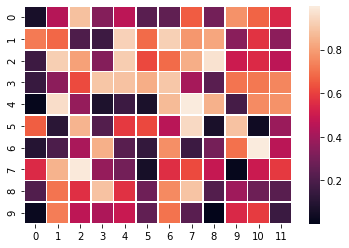

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pylab as plt

uniform_data = np.random.rand(10, 12)


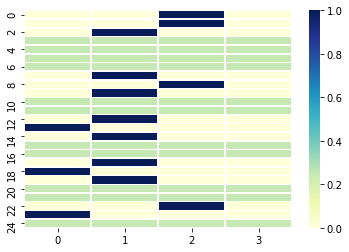

In [33]:
# fig, ax = plt.subplots(figsize=(5,10))
# plt.figure(figsize=(1,1))
# im = ax.imshow(agent.policy, cmap='hot', interpolation='nearest', linewidth=0.5)
ax = sns.heatmap(agent.policy, linewidth=0.5,  cmap="YlGnBu")
plt.save()

In [159]:
#test
env = gym.make('maze-sample-5x5-v0')
obs = env.reset()
state = get_state(obs)

for _ in range(trajectory_len):

    action = agent.get_action(state)

    obs, reward, done, _ = env.step(action)
    state = get_state(obs)
    
    env.render()

    if done:
        break
    time.sleep(0.5)

In [284]:
gym.make("Taxi-v3")



<TimeLimit<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<TaxiEnv<Taxi-v3>>>>>>

In [ ]:
get_trajectory()

In [189]:
agent.get_action(1)

1

In [126]:
agent.get_action(0)

2

In [133]:
trajectories = get_trajectory(agent, 5)

In [134]:
trajectories

{'states': [0, 0, 0, 0, 0, 1],
 'actions': [3, 1, 1, 0, 2],
 'total_reward': -0.02}